# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

## Importing the dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
X = dataset.iloc[:, 1:-1].values  
y = dataset.iloc[:, -1].values    

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
# periksa nilai yang hilang di setiap kolom
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

**Finding the best value for k**

In [9]:
from sklearn.metrics import accuracy_score
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

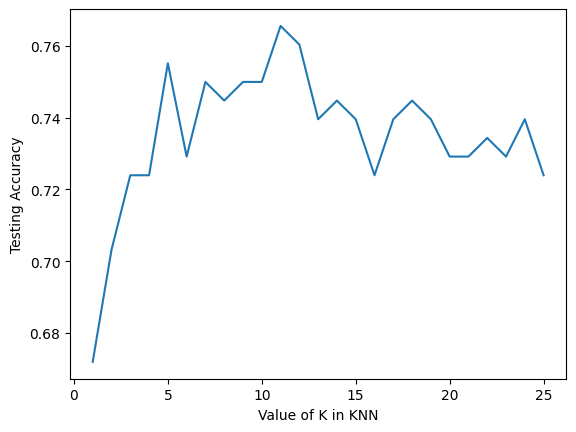

In [10]:
plt.xlabel("Value of K in KNN")
plt.ylabel("Testing Accuracy")
plt.plot(k_range,scores)

In [11]:
optimal_k = k_range[np.argmax(scores)]
print(f"Optimal K: {optimal_k}")

Optimal K: 11


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

## Predicting the Test set results

In [13]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7656


## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[111  16]
 [ 29  36]]


## Visualising the Training set results

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

In [16]:
# Menampilkan koefisien komponen utama
print("Koefisien Komponen PCA (Loading Scores):")
for i, component in enumerate(pca.components_):
    print(f"Komponen {i+1}:")
    for feature, score in zip(dataset.columns[:-1], component):  
        print(f"{feature}: {score}")
    print("\n")

Koefisien Komponen PCA (Loading Scores):
Komponen 1:
Pregnancies: 0.4184723434745892
Glucose: 0.30268479993508657
BloodPressure: 0.4595144587336879
SkinThickness: 0.475392575971199
Insulin: 0.4283388917818668
BMI: 0.3059027118778754
DiabetesPedigreeFunction: 0.1380597523326072


Komponen 2:
Pregnancies: 0.37171111850541666
Glucose: 0.3483513404093379
BloodPressure: -0.4258735161581338
SkinThickness: -0.19200063559477965
Insulin: -0.14903295303281616
BMI: -0.02532924808725054
DiabetesPedigreeFunction: 0.706680479624583




In [ ]:
# Latih model KNN menggunakan data yang telah direduksi menjadi 2D
classifier.fit(X_train_2D, y_train)

# Visualisasi hasil set pelatihan
X_set, y_set = X_train_2D, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Set Pelatihan)')
# Visualisasi hasil set pelatihan
plt.xlabel('SkinThickness')  # Fitur utama dari komponen 1
plt.ylabel('Pregnancies')  # Fitur utama dari komponen 2
plt.legend()
plt.show()


## Visualising the Test set results

In [ ]:
# Latih model KNN menggunakan data yang telah direduksi menjadi 2D
classifier.fit(X_test_2D, y_test)

# Visualisasi hasil set test
X_set, y_set = X_test_2D, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Set Pelatihan)')
# Visualisasi hasil set test
plt.xlabel('SkinThickness')  # Fitur utama dari komponen 1
plt.ylabel('Pregnancies')  # Fitur utama dari komponen 2
plt.legend()
plt.show()